# <font color=fe7401> PySpark </font>

## <font color=hotpink> HDFS </font>

- Big data challenges:
    + storage: the 3 V's of big data are volume, velocity, and variety.
    + processing: due to massive data, processing takes a lot of time.
- For storage problem we can use, `Hadoop Distributed File System (HDFS)` and for processing we can use `Hadoop MapReduce`.
- `Apache Spark` or `Spark` is added on top of `Hadoop MapReduce`, which is 100x faster.
- Tradionaly, for storage we use local storage which can be vertical scaled as we can increase the capaity only. But HDFS stores data in distributed fashion with fault-tolerant ability using replication.
- HDFS follows master-slave architecture:
    + name node or the master daemon manages the data node (slave daemon).
    + only one active name node, but can have multiple data nodes.
    + name node execute file system operations such as renaming, opening, closing files etc. whereas data node can do R/W as per request.
    + data node follows name node instructions to create, delete or replicate blocks.
    + name node stores the metadata, whereas data node stores the actual data in blocks.
- Name node metadata (file location, block size, replication etc.):
    + editlog: only keeps track of recent changes made on hdfs
    + fsimage: keeps track of every change made on hdfs since beginning
- _Secondary name node_ for backup (acts as name node when name node fails) and fault-tolerance which maintains `editlog.copy` and `fsimage.copy`. It combines both copy files to create final check-point `fsimage.ckpt`, by default happens every one hour.
- HDFS Data blocks:
    + hdfs splits massive files into small files called data blocks.
    + default size 128MB in hadoop 2.x and 64MB in hadoop 1.x
    + block size can be configured at /hadoop/hdfs-site.xml
    + block size should not be too small (create lots of metadata) and not too large (processing time increases)
- Default replication = 3, can be set /hdfs-site.xml
- Rack Awareness is a concept that helps to decide where a copy of the data block should be stored. It's a collection of 30-40 data nodes.
- HDFS can't place all the 3-blocks in the same rack, to support fault-tolerance. But can place 2-blocks in the same rack.




## <font color=hotpink> Spark </font>

- Spark was developed to solve the problem of "_scale_". Earlier the RDBMS systems like Orcale, MySQL used to store and process the data. But they're inefficient when the data volume increases or scaled.
- After this, new systems were created like MapReduce, Google File System (GFS).
- But there're some cons for MapReduce like:
     + hard to manage and administer, due to its operational complexity
     + forces the data to be processed using map and reduce workflow only and doesn't support join, filter, union etc.
     + java native, support for other language is missing.
     + only support batch processing, not good for streaming, ML or interactive sql queries
     + stateless machine - read and write to disk before and after each map and reduce stage, this effect the disk I/O performance
     ```
     [HDFS] -> reads -> [MR] -> writes -> [HDFS] -> reads -> [MR] -> writes -> [HDFS]
     ```
- Apache Spark originated as a research project in 2009 at UC Berkeley's AMPLab, aimed at addressing the limitations of Hadoop MapReduce, particularly its inefficiency with iterative algorithms and interactive data processing, and was later open-sourced in 2010.
- After resolving the problem with MapReduce, Spark gains its popularity and the original creators of Apache Spark formed a company known as Databricks, a global data, analytics, and AI company, came into existence in 2013.
- Spark features:
    + Fault Tolerance: Apache Spark is designed to handle worker node failures. It achieves this fault tolerance by using DAG and RDD (Resilient Distributed Datasets). DAG contains the lineage of all the transformations and actions needed to complete a task. So in the event of a worker node failure, the same results can be achieved by rerunning the steps from the existing DAG.
    + Dynamic nature: Spark offers over 80 high-level operators that make it easy to build parallel apps.
    + Lazy Evaluation: Spark does not evaluate any transformation immediately. All the transformations are lazily evaluated. The transformations are added to the DAG and the final computation or results are available only when actions are called. This gives Spark the ability to make optimization decisions, as all the transformations become visible to the Spark engine before performing any action.
    + Real Time Stream Processing: Spark Streaming brings Apache Spark's language-integrated API to stream processing, letting us write streaming jobs the same way we write batch jobs.
     + Speed: Spark enables applications running on Hadoop to run up to 100x faster in memory and up to 10x faster on disk. Spark achieves this by minimizing disk read/write operations for intermediate results. It stores in memory and performs disk operations only when essential. Spark achieves this using DAG, query optimizer and highly optimized physical execution engine.
    + Reusability: Spark code can be used for batch-processing, joining streaming data against historical data as well as running ad-hoc queries on streaming state.
    + Advanced Analytics: Apache Spark has rapidly become the de facto standard for big data processing and data sciences across multiple industries. Spark provides both machine learning and graph processing libraries, which companies across sectors leverage to tackle complex problems. And all this is easily done using the power of Spark and highly scalable clustered computers. Databricks provides an Advanced Analytics platform with Spark.  
    + In Memory Computing: Unlike Hadoop MapReduce, Apache Spark is capable of processing tasks in memory and it is not required to write back intermediate results to the disk. This feature gives massive speed to Spark processing. Over and above this, Spark is also capable of caching the intermediate results so that it can be reused in the next iteration. This gives Spark added performance boost for any iterative and repetitive processes, where results in one step can be used later, or there is a common dataset which can be used across multiple tasks.
    + Supporting Multiple languages: Spark comes inbuilt with multi-language support. It has most of the APIs available in Java, Scala, Python and R. Also, there are advanced features available with R language for data analytics. Also, Spark comes with SparkSQL which has  an SQL like feature. SQL developers find it therefore very easy to use, and the learning curve is reduced to a great level.
    + Integrated with Hadoop: Apache Spark integrates very well with Hadoop file system HDFS. It offers support to multiple file formats like parquet, json, csv, ORC, Avro etc. Hadoop can be easily leveraged with Spark as an input data source or destination.
    + Cost efficient: Apache Spark is an open source software, so it does not have any licensing fee associated with it. Users have to just worry about the hardware cost. Also, Apache Spark reduces a lot of other costs as it comes inbuilt for stream processing, ML and Graph processing. Spark does not have any locking with any vendor, which makes it very easy for organizations to pick and choose Spark features as per their use case.
    
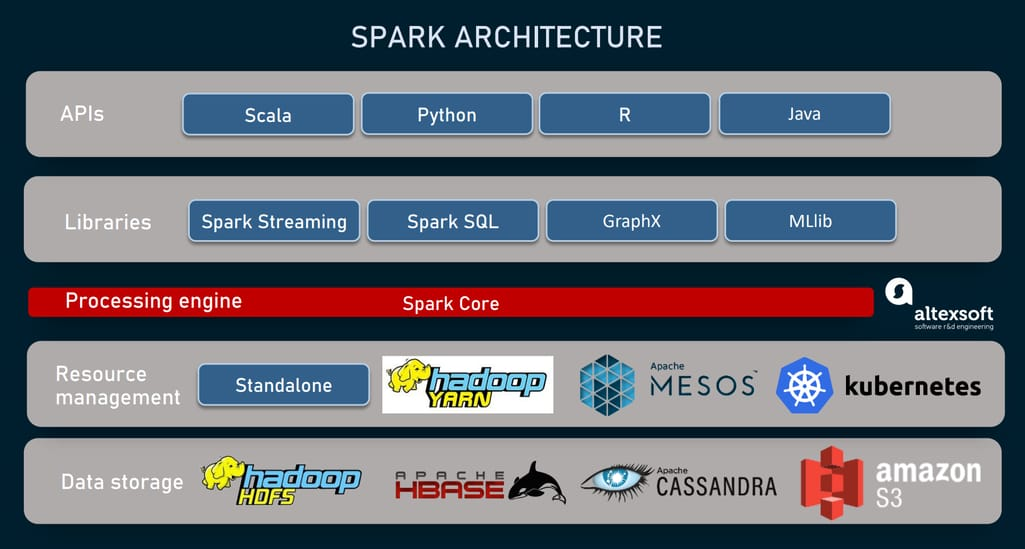

### <font color=brown> Installing PySpark </font>

- Download the [Apache Spark](https://spark.apache.org/downloads.html).
- Download the [Java 17 JDK](https://download.oracle.com/java/17/archive/jdk-17.0.12_windows-x64_bin.exe)
- Download the [WinUtils](https://github.com/kontext-tech/winutils/tree/master/hadoop-3.3.0/bin) `.exe` and `.dll` file.
- Now create folder
    + `C:\Spark`: Place Spark file content here
    + `C:\Hadoop\bin`: Place downloaded `winutils.exe` and `hadoop.dll` file here
- Atlast set the environment variable:
    + JAVA_HOME <- `C:\Program Files\Java`
    + SPARK_HOME <- `C:\Spark`
    + HADOOP_HOME <- `C:\Hadoop`
    + Update the PATH variable <- `%JAVA_HOME%\bin;%SPARK_HOME%\bin;%HADOOP_HOME%\bin;`
- Check for successful installation:
    + In CMD type `spark-shell`
    + Or type `pyspark` for python interface
- Now, to run the pyspark session with jupyter interface run below command:
    ```
      >>> export PYSPARK_DRIVER_PYTHON='jupyter'; export PYSPARK_DRIVER_PYTHON_OPTS='notebook --port=8889'; pyspark
    ```

### <font color=brown> SparkSession </font>

- After Spark 2.x, `SparkSession(spark)` is the new entry point to work with RDD, Dataframe and all other functions.
- Prior to 2.x, `SparkContext(sc)` used to be the entry point for:
    + `SparkContext`: entry point for RDD, accumulators, and other
    + `SQLContext`: used to initialize the functionalities of spark sql
    + `HiveContext`: superset of SQLContext
- Almost all API available in SparkContext, SQLContext, HiveContext are now available in SparkSession now.
- By default, spark shell provides `spark` object which is the instance of `SparkSession` class.
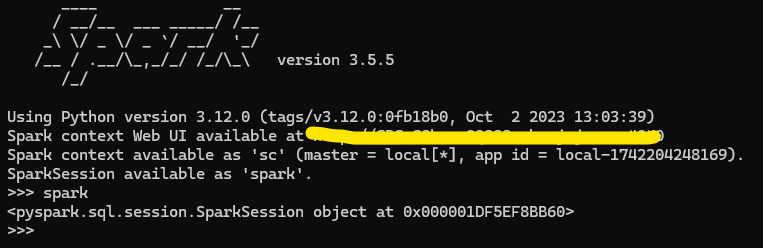
- The `spark-submit` script in Spark’s bin directory is used to launch applications on a cluster [doc link](https://spark.apache.org/docs/latest/submitting-applications.html).

In [3]:
# !pip show pyspark

In [4]:
# from pyspark.sql import SparkSession


### <font color=brown> RDD (Resilient Distributed Dataset) </font>

- Spark has two types of data structures:
    1. RDD
    2. Dataframes
- RDD is the fundamental abstraction of spark on which it was created initially. Almost everything in spark is built on top of it. They're low level APIs.
- `Resilient`: means able to withstand or recover quickly from difficult condition.
    + RDD's are immutable and cannot be modified once created
    + fault tolerance: RDD tracks data lineage info to recover lost data quickly and automatically, on failure
- `Distributed`: divided into smaller chunks called partitions and distributed on multiple nodes of cluster like 200MB file divided into 2 x 128MB block file
- `Dataset`: as it holds data
- RDD main features :
    1. Resilient
    2. Distributed
    3. Lazy evaluation
        + RDD has two operation i) transformation ii) action. And only transformation is the lazy operation and evaluation started when action is triggered.
        + Tranformation: method on RDD which returns another RDD
        + Action: method on RDD which return value
        + For example, we can run a transformation to filter our dataframe - df.filter() - But Spark won’t actually filter our dataframe until we run an action e.g. showing our dataframe: df.show().
        + Now why lazy evaluation, why not immediate action? Answer is similar to analogy of grocery shopping. Suppose, every time we think of buying something, we head straight to the supermarket to obtain it. But we want to try something new. We think about waiting until the end of the week to go to the supermarket. Since we don’t need some groceries immediately, when we think of an item we need, we can just add it to our list.
        + By not executing transformations on a dataframe immediately, we avoid bringing the entire dataframe into memory immediately. This can save cluster capacity, as storing a dataframe in memory can be a resource-intensive operation.
        + Code example:
            ```
                # Transformation 1 : You return a dataframe where the price column is multiplied by 2
                df = df.withColumn('price', df.price * 2)
                # Transformation 2 : You return a dataframe where the price column is multiplied by 3
                df = df.withColumn('price', df.price * 3)
                # Transformation 3: You return a dataframe where the price column is multiplied by 5
                df = df.withColumn('price', df.price * 5)
                df_collect = df.collect()
            ```
        + Lazy evaluation means we hold off on performing any of the 3 transformations, so the price column has not been modified yet. Then you run an action: df.collect(). Now thanks to the catalyst optimizer, Spark combines the three transformations into one: multiply the price column by 30.
    4. Immutability
    5. In-memory computation
    6. Process structure, semi-structure like JSON and unstructured data like image, text
- There are some drawbacks of using RDDs though:
    + RDD code can sometimes be very opaque. Developers might struggle to find out what exactly the code is trying to compute.
    + RDDs cannot be optimized by Spark, as Spark cannot look inside the lambda functions and optimize the operations. In some cases, where a filter() is piped after a wide transformation, Spark will never perform the filter first before the wide transformation, such as reduceByKey() or groupByKey().


In [6]:
x = 5
print('Hello')

Hello


In [4]:
# Import Libraries
from pyspark.sql.types import StructType, StructField, FloatType, BooleanType
from pyspark.sql.types import DoubleType, IntegerType, StringType
import pyspark
from pyspark import SQLContext
# Setup the Configuration
conf = pyspark.SparkConf()
spark_context = SparkSession.builder.config(conf=conf).getOrCreate()
sqlcontext = SQLContext(sc)
# Setup the Schema
schema = StructType([
StructField("User ID", IntegerType(),True),
StructField("Username", StringType(),True),
StructField("Browser", StringType(),True),
StructField("OS", StringType(),True),
])
# Add Data
data = ([(1580, "Barry", "FireFox", "Windows" ),
(5820, "Sam", "MS Edge", "Linux"),
(2340, "Harry", "Vivaldi", "Windows"),
(7860, "Albert", "Chrome", "Windows"),
(1123, "May", "Safari", "macOS")
])
# Setup the Data Frame
user_data_df = sqlcontext.createDataFrame(data,schema=schema)

NameError: name 'SparkSession' is not defined